In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/rocket/anaconda2/h2o_jar/h2o.jar
  Ice root: /tmp/tmpxqX1HW
  JVM stdout: /tmp/tmpxqX1HW/h2o_rocket_started_from_python.out
  JVM stderr: /tmp/tmpxqX1HW/h2o_rocket_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,"1 year, 2 months and 23 days !!!"
H2O cluster name:,H2O_from_python_rocket_jthoh6
H2O cluster total nodes:,1
H2O cluster free memory:,3.464 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [2]:
data = h2o.import_file(path="../datasets/kickstarter-2018-reduced.csv")
data.describe()
data = data.asnumeric()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:29999
Cols:10




,category,main_category,currency,goal,launched_utc,state,backers,country,usd pledged,time_open
type,enum,enum,enum,real,int,enum,int,enum,real,int
mins,0.0,0.0,0.0,1.0,3600.0,0.0,0.0,0.0,0.0,24.0
mean,NaN,NaN,NaN,39679.8923187,1411614526.6,NaN,104.256908564,NaN,6904.48511524,831.233841128
maxs,158.0,14.0,13.0,100000000.0,1514880718.0,5.0,85581.0,22.0,8596474.58,356809.0
sigma,NaN,NaN,NaN,743464.274157,61066107.2589,NaN,899.326567671,NaN,75466.6634392,2078.18963537
zeros,58,2266,622,0,0,3032,4275,51,5216,0
missing,0,0,0,0,0,0,0,0,304,0
0,Poetry,Publishing,GBP,1000.0,1439295148.0,failed,0.0,GB,0.0,1415.0
1,Narrative Film,Film & Video,USD,30000.0,1504327437.0,failed,15.0,US,100.0,1438.0
2,Narrative Film,Film & Video,USD,45000.0,1357950050.0,failed,3.0,US,220.0,1080.0


In [3]:
from h2o.estimators.kmeans import H2OKMeansEstimator
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=data.col_names[0:-1], training_frame = data)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [4]:
clusters = 4
predicted = results[clusters-2].predict(data)
data["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


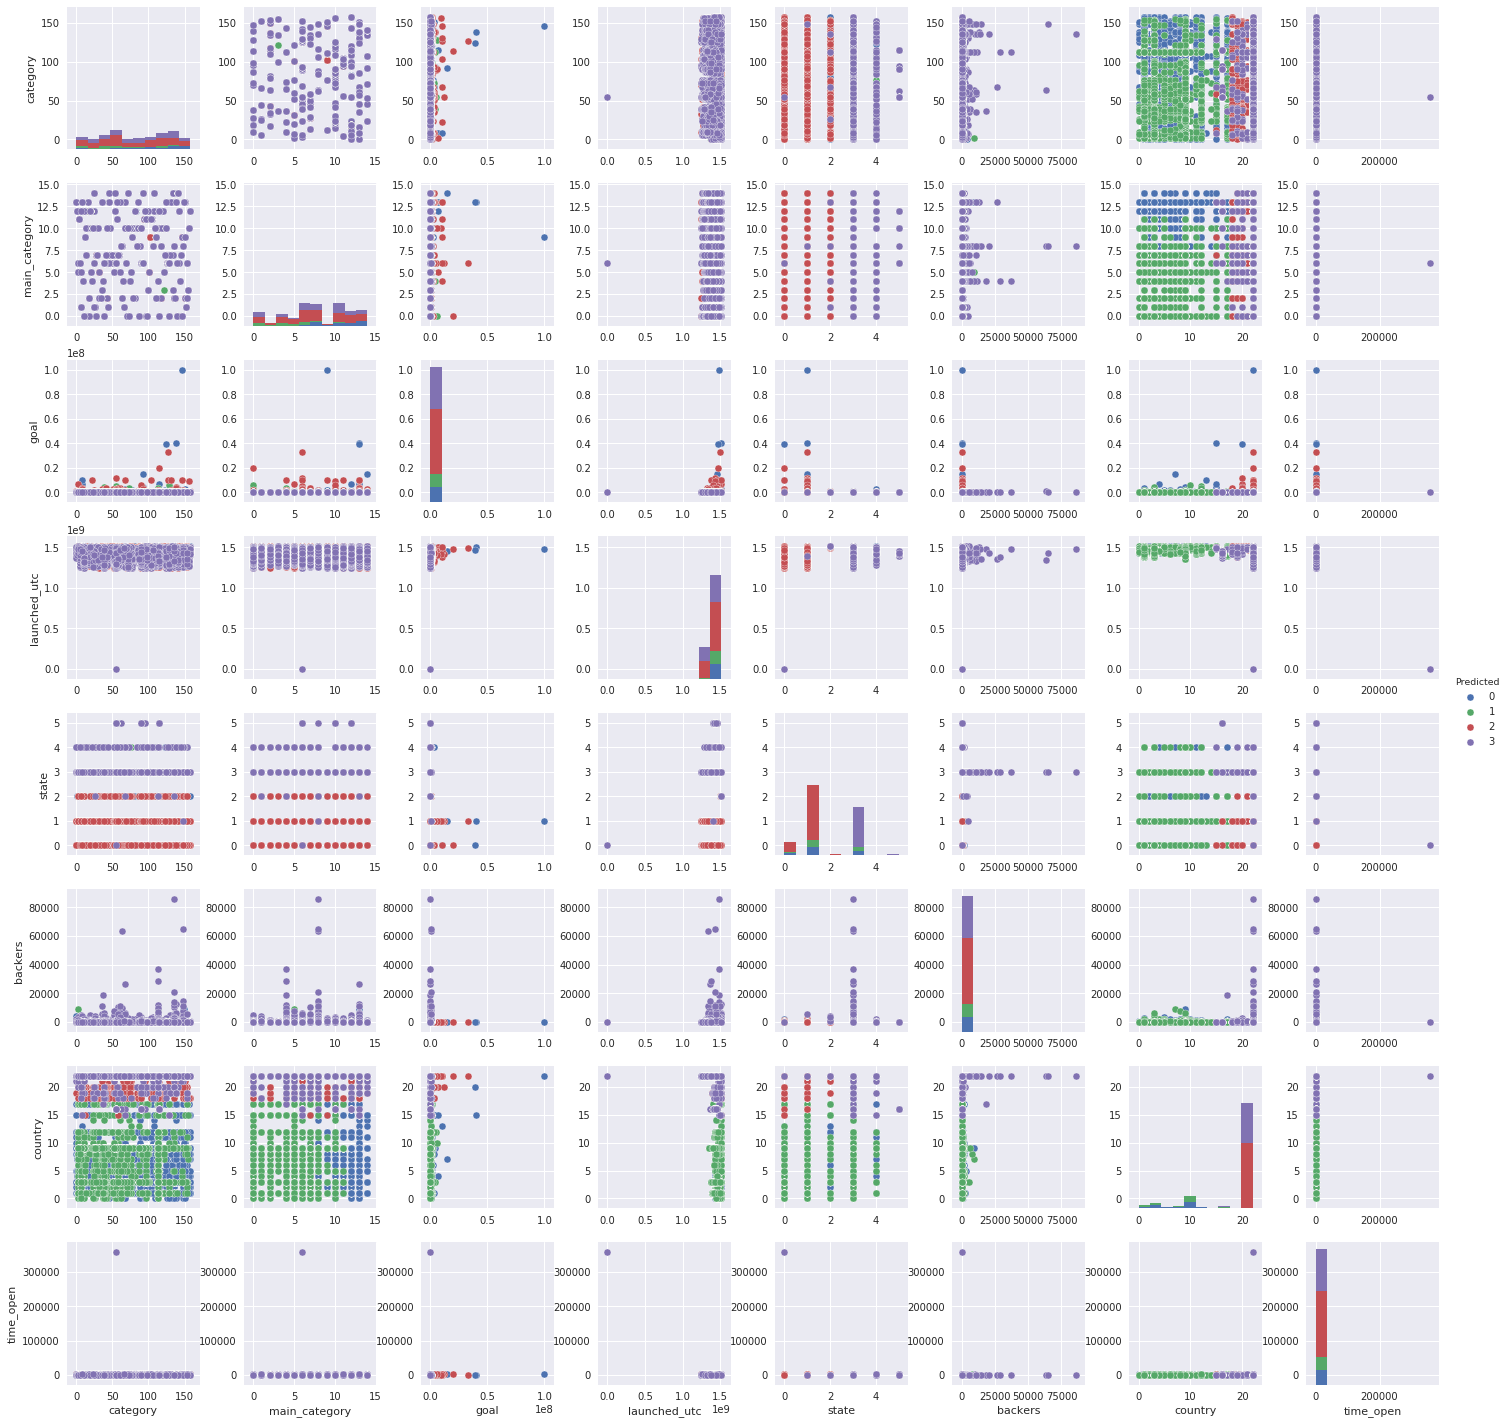

In [5]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(data.as_data_frame(True), vars=["category", "main_category",
                                             "goal", "launched_utc", "state", "backers",
                                             "country", "time_open"], hue="Predicted");

In [6]:
h2o.shutdown()

H2O session _sid_903d closed.
